In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

Enunciado: Escribe una función llamada `scrape_coches_ocasion` que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la [siguiente](https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2) url.
2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará `None`.


In [3]:
url = "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"
res_coches = requests.get(url)
res_coches

<Response [200]>

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.


b'<!DOCTYPE html><html lang="es"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1"/><link rel="preload" as="image" href="https://images.grupoocasionplus.com/ddeaewPXqf7D804wnMdyx25wksBYDIY_2L7ViblpDbI/mobilex2/aHR0cHM6Ly9vY2FzaW9ucGx1cy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDUvOTMvMTEvMjMvMC94MDEuanBnP21kNT1mMjk0ZGQxMjU5OWE3ZTQwNTQyY2JhMjA3OTQ2YTcyYg" fetchPriority="high"/><link rel="stylesheet" href="/hera/_next/static/css/b1f3862f1eca62dd.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/51c286ae0cbd7c1d.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/2037a48a6aaa070d.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/0fec6697d79e9eb4.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/2d917599f29504e8.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/8b0c2b6bef49b653.css" data-
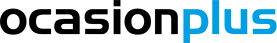

In [4]:
res_coches.content

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="image" fetchpriority="high" href="https://images.grupoocasionplus.com/ddeaewPXqf7D804wnMdyx25wksBYDIY_2L7ViblpDbI/mobilex2/aHR0cHM6Ly9vY2FzaW9ucGx1cy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDUvOTMvMTEvMjMvMC94MDEuanBnP21kNT1mMjk0ZGQxMjU5OWE3ZTQwNTQyY2JhMjA3OTQ2YTcyYg" rel="preload"/><link data-precedence="next" href="/hera/_next/static/css/b1f3862f1eca62dd.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/51c286ae0cbd7c1d.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/2037a48a6aaa070d.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/0fec6697d79e9eb4.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/2d917599f29504e8.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/8b0c2b6bef49b653.css" 
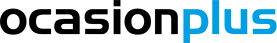

In [6]:
scrape_coches_ocasion = BeautifulSoup(res_coches.content, "html.parser")
scrape_coches_ocasion

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="image" fetchpriority="high" href="https://images.grupoocasionplus.com/ddeaewPXqf7D804wnMdyx25wksBYDIY_2L7ViblpDbI/mobilex2/aHR0cHM6Ly9vY2FzaW9ucGx1cy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDUvOTMvMTEvMjMvMC94MDEuanBnP21kNT1mMjk0ZGQxMjU5OWE3ZTQwNTQyY2JhMjA3OTQ2YTcyYg" rel="preload"/>
  <link data-precedence="next" href="/hera/_next/static/css/b1f3862f1eca62dd.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/51c286ae0cbd7c1d.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/2037a48a6aaa070d.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/0fec6697d79e9eb4.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/2d917599f29504e8.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/stat
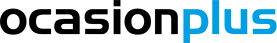

In [7]:
print(scrape_coches_ocasion.prettify())

In [19]:
lista_nombre_coches = scrape_coches_ocasion.find_all("div", {"class": "cardVehicle_description__Gp9vd"})

In [60]:
type(lista_nombre_coches[0])

bs4.element.Tag

In [65]:
lista_nombre_coches[0].find("span", {"data-test": "span-brand-model"}).text

'KIA Ceed'

In [79]:
#Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.
scrape_coches_ocasion2 = {"coche": [], "precio rebajado": [], "precio original":[], "Km": []}
for coche in lista_nombre_coches:
     scrape_coches_ocasion2["coche"].append(coche.find("span", {"data-test": "span-brand-model"}).text)
       
    

In [80]:
scrape_coches_ocasion2

{'coche': ['KIA Ceed',
  'Toyota C-HR',
  'Seat León',
  'Audi Q5',
  'Ford Tourneo Courier',
  'Renault Arkana',
  'Mazda Mazda3',
  'Mercedes Clase A',
  'KIA Niro',
  'Hyundai i20',
  'Seat Ibiza',
  'Cupra Formentor',
  'Renault Clio',
  'BMW Serie 3',
  'Ford Focus',
  'Volkswagen Tiguan',
  'Cupra Formentor',
  'Nissan Townstar',
  'Peugeot 2008',
  'Peugeot 3008'],
 'precio rebajado': [],
 'precio original': [],
 'Km': []}